#1.Preview data


In [1]:
import pandas as pd
import numpy as np

rossmen_data = pd.read_csv("NFL/train.csv")

np.random.seed(0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
rossmen_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,7/31/2015,5263,555.0,1.0,1.0,0,1
1,2,5.0,7/31/2015,6064,625.0,1.0,1.0,0,1
2,3,5.0,7/31/2015,8314,821.0,1.0,1.0,0,1
3,4,5.0,7/31/2015,13995,1498.0,NaN,1.0,0,1
4,5,5.0,7/31/2015,4822,559.0,1.0,1.0,0,1


#2.Check total number of entries and column types

In [3]:
rossmen_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [4]:
rossmen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      872479 non-null   float64
 2   Date           1017209 non-null  object 
 3   Sales          1017209 non-null  int64  
 4   Customers      1014883 non-null  float64
 5   Open           1017204 non-null  float64
 6   Promo          1017207 non-null  float64
 7   StateHoliday   1017206 non-null  object 
 8   SchoolHoliday  1017209 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 69.8+ MB


#3.Check any null values/ Impute null value.

In [5]:
# Per column missing values
missing_values_count = rossmen_data.isnull().sum()
missing_values_count[0:len(rossmen_data.columns)]

Store                 0
DayOfWeek        144730
Date                  0
Sales                 0
Customers          2326
Open                  5
Promo                 2
StateHoliday          3
SchoolHoliday         0
dtype: int64

In [6]:
# Total missing values
total_cells = np.product(rossmen_data.shape)
total_missing = missing_values_count.sum()

In [7]:
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("Missing data % :",percent_missing)

Missing data % : 1.6064217546902029


In [8]:
# Remove all the rows with 0 by placing NaN(Null Values)
rows_with_nan_dropped = rossmen_data.replace(0,np.nan)
rows_with_nan_dropped.dropna().head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,7/31/2015,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,7/31/2015,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,7/31/2015,8314.0,821.0,1.0,1.0,0,1.0
4,5,5.0,7/31/2015,4822.0,559.0,1.0,1.0,0,1.0
6,7,5.0,7/31/2015,15344.0,1414.0,1.0,1.0,0,1.0


In [9]:
# Select Categorical Data
rows_with_na_filled=rossmen_data.loc[:,'Sales':'Customers']
# Impute all zero values to previous values
rows_with_na_filled_value=rows_with_na_filled.fillna(method='bfill', axis=0).fillna(0)
# Replace all null or empty value to 0.
rows_with_na_filled_value.replace(0,np.nan).dropna().head()

,Sales,Customers
0,5263.0,555.0
1,6064.0,625.0
2,8314.0,821.0
3,13995.0,1498.0
4,4822.0,559.0


In [10]:
#New cleaned data set with deleting all values
new_rossmen_cleaned_data=rows_with_nan_dropped.dropna().fillna(method='bfill', axis=0).fillna(0)

In [11]:
#imputing Customers Column
rossmen_data['Customers_Med_Value']=rossmen_data.groupby('Store')['Customers'].transform(lambda x: x.fillna(x.median()))

In [12]:
#imputing Open Column
rossmen_data['Open'] = rossmen_data['Open'].fillna(rossmen_data['Open'].median())

In [13]:
#imputing Promo Column
rossmen_data['Promo'] = rossmen_data['Promo'].fillna(rossmen_data['Promo'].median())

#Drop rows in StateHoliday value NaN
rossmen_data.dropna(axis=0,subset=['StateHoliday'],inplace=True)

In [14]:
#imputing DayOfWeek Column
da=rossmen_data['Date'].unique()
for i in da:
    s = pd.date_range(i, i, freq='D').to_series()
    day=s.dt.dayofweek[-1]
    rossmen_data['DayOfWeek']=rossmen_data['DayOfWeek'].fillna(day+1)

In [15]:
rossmen_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017206 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017206 non-null  int64  
 1   DayOfWeek            1017206 non-null  float64
 2   Date                 1017206 non-null  object 
 3   Sales                1017206 non-null  int64  
 4   Customers            1014880 non-null  float64
 5   Open                 1017206 non-null  float64
 6   Promo                1017206 non-null  float64
 7   StateHoliday         1017206 non-null  object 
 8   SchoolHoliday        1017206 non-null  int64  
 9   Customers_Med_Value  1017206 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 85.4+ MB


In [16]:
rossmen_data.isnull().sum()

Store                     0
DayOfWeek                 0
Date                      0
Sales                     0
Customers              2326
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
Customers_Med_Value       0
dtype: int64

In [17]:
rossmen_data['StateHoliday'] = rossmen_data['StateHoliday'].astype('str')
rossmen_data.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

#4.Check duplicate entries

In [18]:
rossmen_data['Customers'].isnull().values.any()

True

In [19]:
rossmen_data['Sales'].isnull().values.any()

False

In [20]:
if len(rossmen_data[rossmen_data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(rossmen_data[rossmen_data.duplicated()]))
    print(rossmen_data[rossmen_data.duplicated()].sort_values(by=list(rossmen_data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [21]:
columns_with_na_dropped=rossmen_data.dropna(axis=1)
columns_with_na_dropped.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Customers_Med_Value
0,1,5.0,7/31/2015,5263,1.0,1.0,0,1,555.0
1,2,5.0,7/31/2015,6064,1.0,1.0,0,1,625.0
2,3,5.0,7/31/2015,8314,1.0,1.0,0,1,821.0
3,4,5.0,7/31/2015,13995,1.0,1.0,0,1,1498.0
4,5,5.0,7/31/2015,4822,1.0,1.0,0,1,559.0


In [22]:
print("Columns in original dataset: %d" % rossmen_data.shape[1])
print("Rows with na's dropped: %d" % rows_with_nan_dropped.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 10
Rows with na's dropped: 9
Columns with na's dropped: 9


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#rossmen_data[['Store','Sales']].plot(kind='bar', x='Store', y='Sales')

#5.Plot distribution of numeric data (univariate and pairwise joint distribution)

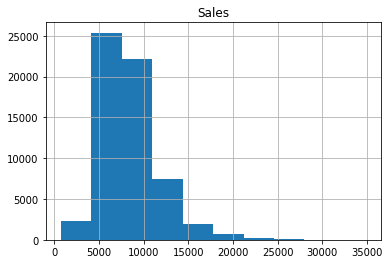

In [25]:
rows_with_nan_dropped.dropna().hist(column='Sales')
plt.show()

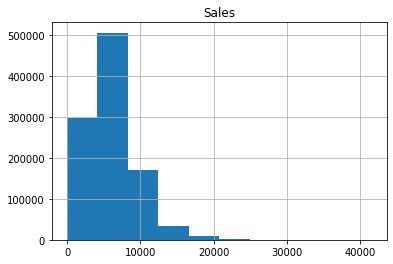

In [26]:
rossmen_data.hist(column='Sales')
plt.show()

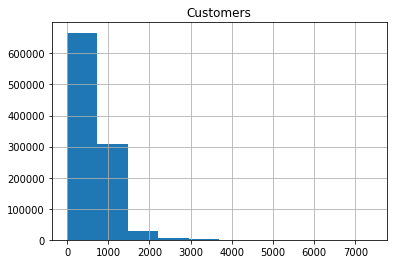

In [27]:
rossmen_data.hist(column='Customers')
plt.show()

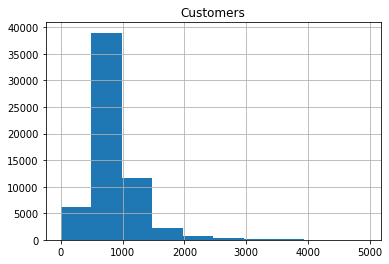

In [28]:
rows_with_nan_dropped.dropna().hist(column='Customers')
plt.show()

In [29]:
def scatter_plot(feature, target):
    plt.figure(figsize=(20, 8))
    plt.scatter(
        rossmen_data[feature],
        rossmen_data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

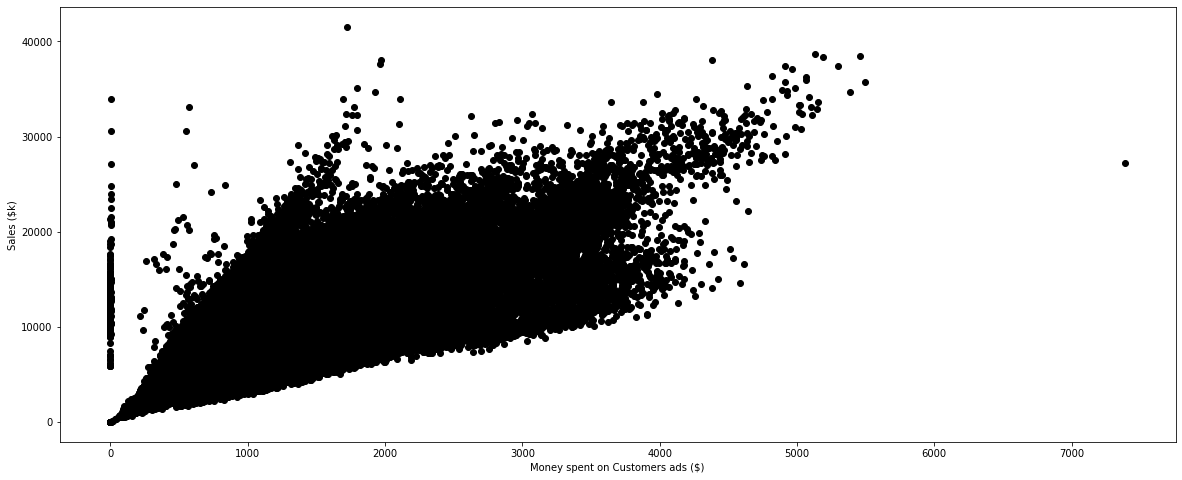

In [30]:
#Original DataSet
scatter_plot('Customers', 'Sales')

In [31]:
def scatter_plot(feature, target):
    plt.figure(figsize=(20, 8))
    plt.scatter(
        rows_with_nan_dropped.dropna()[feature],
        rows_with_nan_dropped.dropna()[target],
        c='black'
    )
    plt.xlabel("{} ads".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

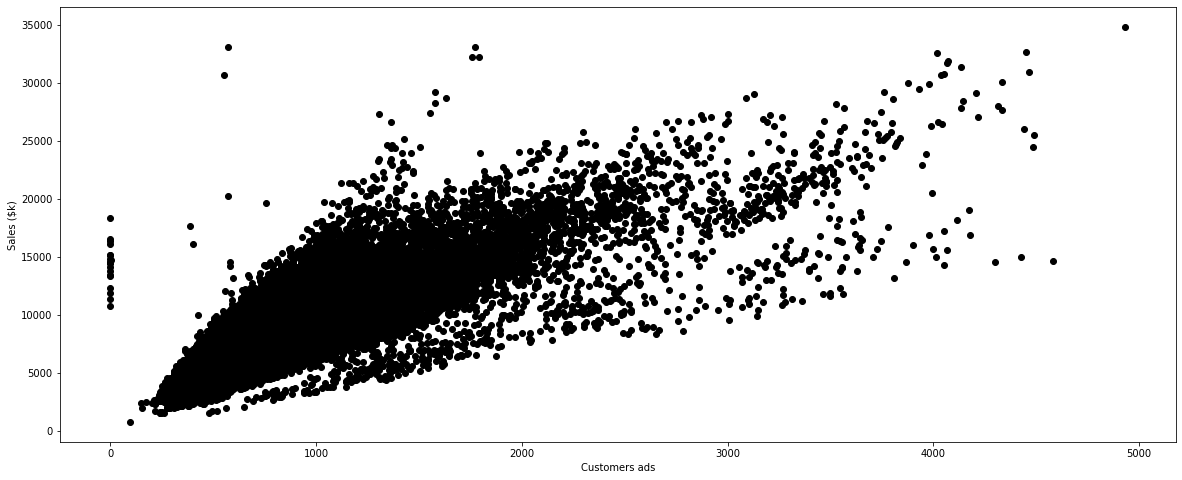

In [32]:
#Removing Null Values Rows with new DataSet
scatter_plot('Customers', 'Sales')

#6.Plot count distribution of categorical data

Determine the Day of week with sales and Customers

In [33]:
def scatter_plot(feature, target):
    plt.figure(figsize=(20, 8))
    plt.scatter(
        rows_with_nan_dropped.dropna()[feature],
        rows_with_nan_dropped.dropna()[target],
        c='black'
    )
    plt.xlabel("{} ads".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()
#plt.bar(df['name'],df['num_pets'], label="Bar")

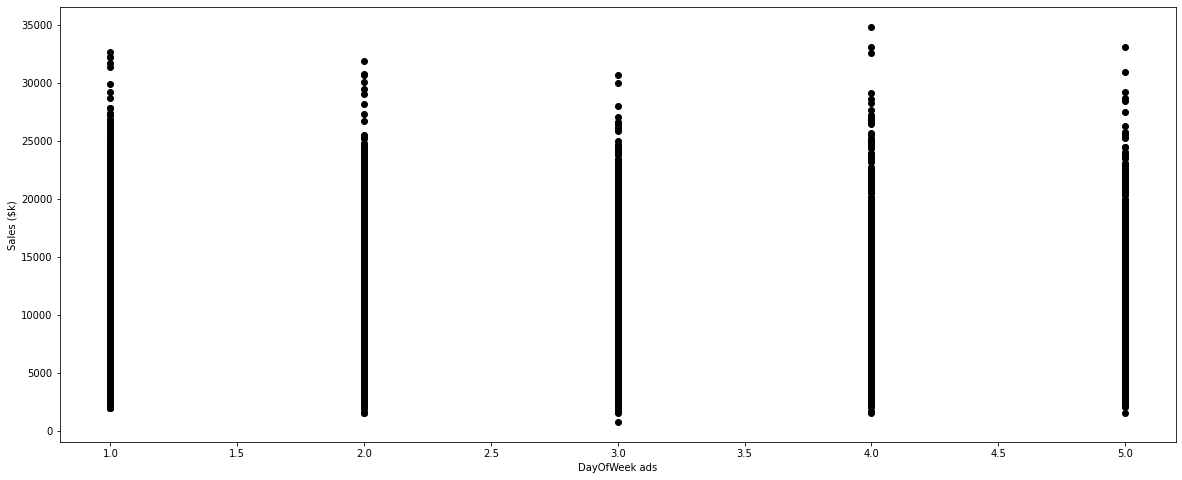

In [34]:
scatter_plot('DayOfWeek', 'Sales')

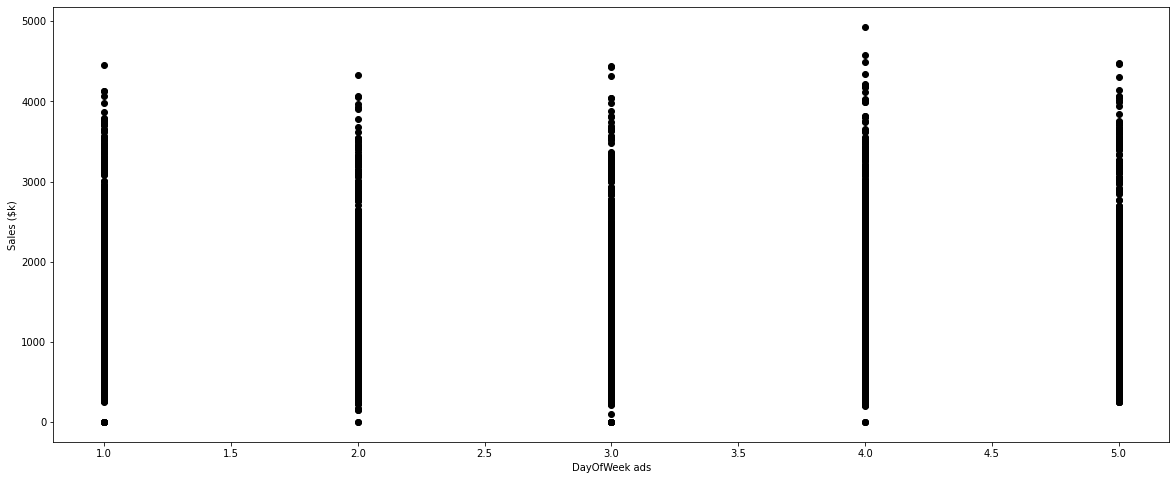

In [35]:
scatter_plot('DayOfWeek', 'Customers')

#Scatter Plot is not well suited for this so now tried with Bar Plot.

In [36]:
def bar_plot(feature, target):
    plt.figure(figsize=(20, 8))
    plt.bar(
        rows_with_nan_dropped.dropna()[feature],
        rows_with_nan_dropped.dropna()[target]
    )
    plt.xlabel("{} ads".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

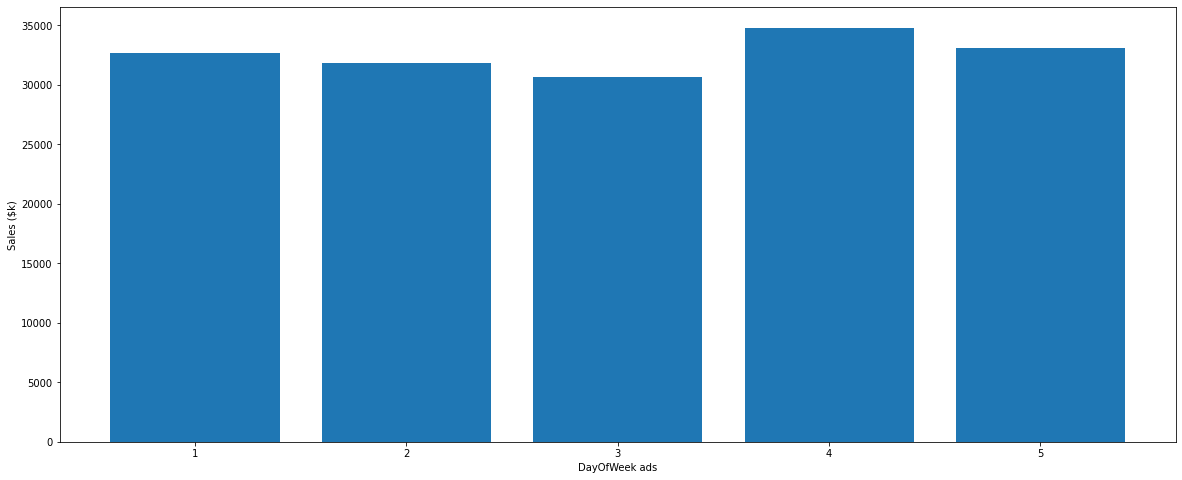

In [37]:
bar_plot('DayOfWeek','Sales')

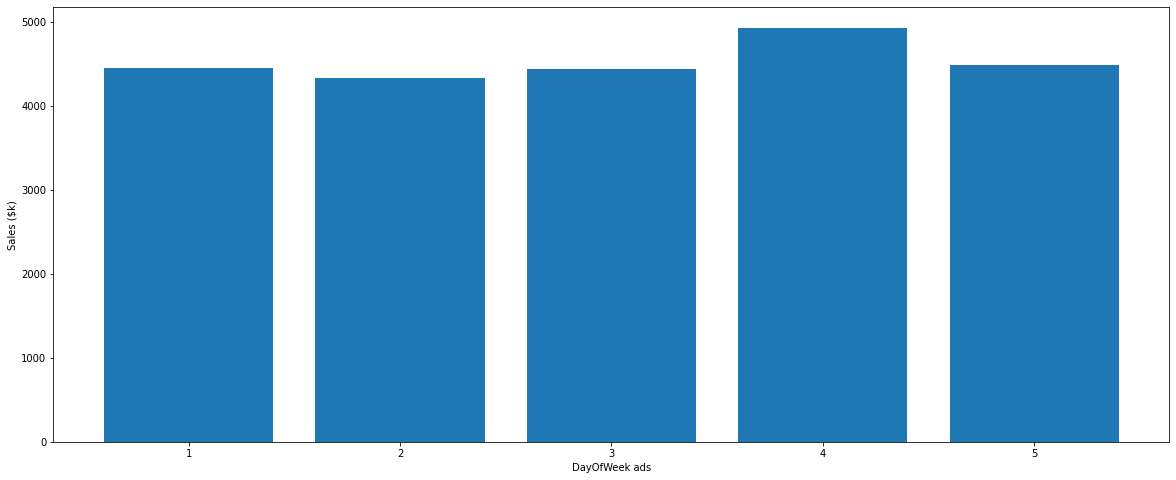

In [38]:
bar_plot('DayOfWeek','Customers')

In [39]:
def box_plot(feature, target):
    plt.figure(figsize=(20, 8))
    data_plotter= rows_with_nan_dropped.dropna()[feature], rows_with_nan_dropped.dropna()[target]
    plt.boxplot(data_plotter)
    plt.xlabel("{} ads".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

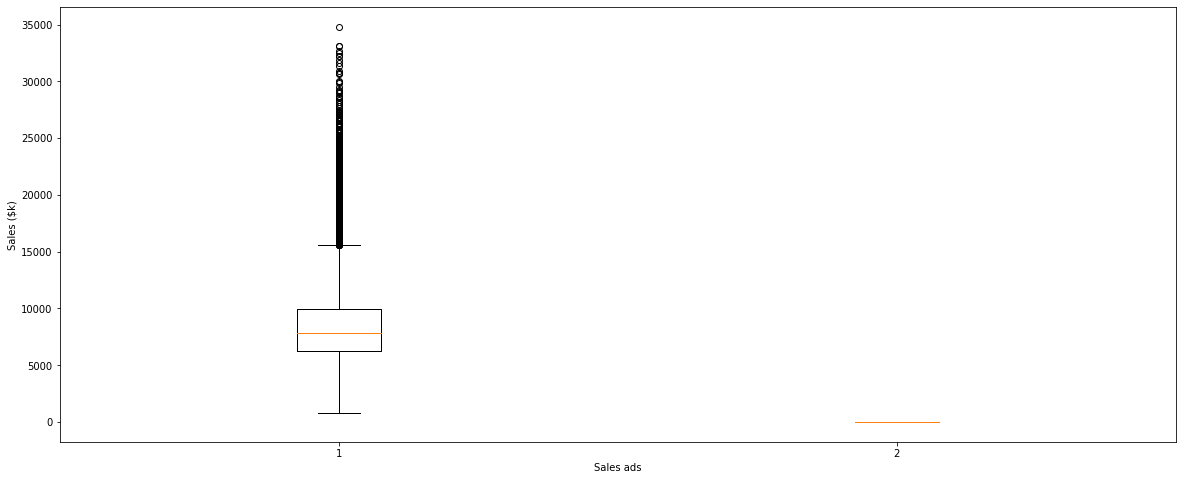

In [40]:
box_plot('Sales','DayOfWeek')

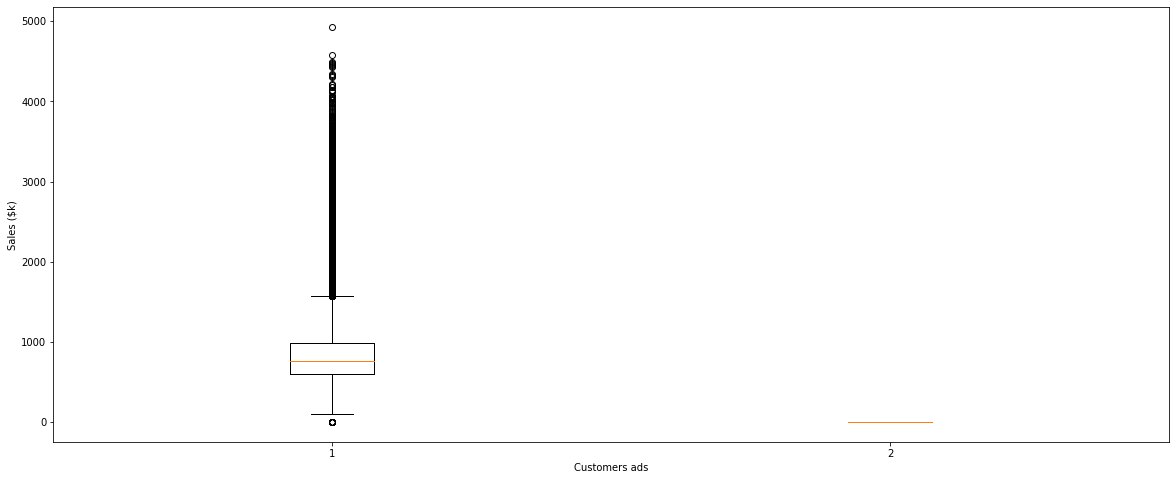

In [41]:
box_plot('Customers','DayOfWeek')

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

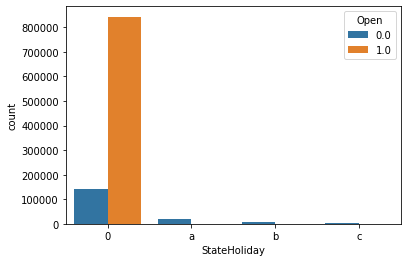

In [42]:
# To check whether the store is open during Stateholiday
sns.countplot(x="StateHoliday", hue="Open", data=rossmen_data)

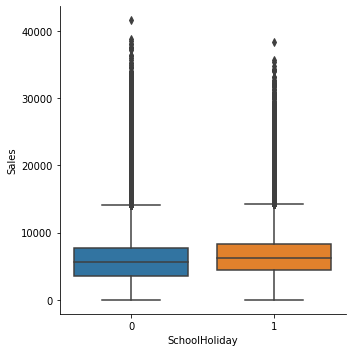

In [43]:
#Sales when SchoolHoliday is there
sns.catplot(x="SchoolHoliday", y="Sales", kind="box", data=rossmen_data)

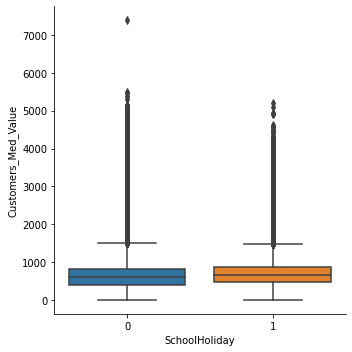

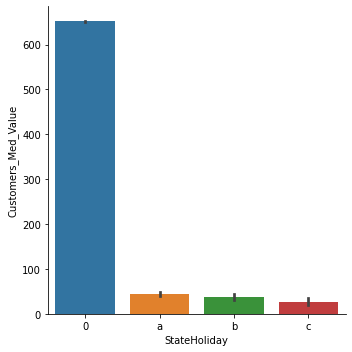

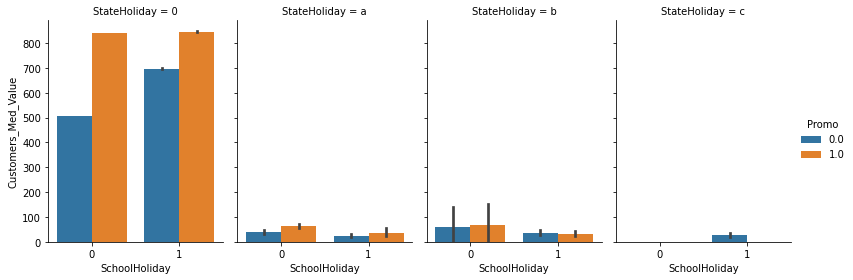

In [44]:
#Sales when customers per SchoolHoliday is there
sns.catplot(x="SchoolHoliday", y="Customers_Med_Value", kind="box", data=rossmen_data)
#Total Customers on Stateholiday
sns.catplot(x="StateHoliday", y="Customers_Med_Value",kind='bar',data=rossmen_data)
#Total Customers on Schoolholiday with promotion and stateholiday
sns.catplot(x="SchoolHoliday", y="Customers_Med_Value", hue="Promo", col="StateHoliday",kind='bar',data=rossmen_data,height=4, aspect=.7)